## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



In [ ]:
!pip install scipy
!pip install tensorflow
!pip install torch
!pip install kaggle

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
data = 'https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification'
od.download(data)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: carlosnoe
Your Kaggle Key: ··········


100%|██████████| 92.1M/92.1M [00:03<00:00, 30.5MB/s]


In [ ]:
import os
os.chdir('fake-news-classification')
os.listdir()


['WELFake_Dataset.csv']

In [ ]:
df = pd.read_csv('WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
df.shape

(72134, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns={'index':'columna', 0:"total"})
completitud["completitud"] = (1 - completitud['total'] / df.shape[0]) * 100
completitud = completitud.sort_values(by="completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud.head(21)

,columna,total,completitud
0,title,558,99.226440
1,text,39,99.945934
2,Unnamed: 0,0,100.000000
3,label,0,100.000000


In [ ]:
df.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
72129,False,False,False,False
72130,False,False,False,False
72131,False,False,False,False
72132,False,False,False,False


In [ ]:
df = df.dropna()
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Codificar las etiquetas de clase

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_tokens = tokenizer.texts_to_sequences(X)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
#Completar sequencias para que tengan la misma longitud

max_sequence_length = max([len(x) for x in X_tokens])
max_sequence_length



22663

In [ ]:
X_train_pad = pad_sequences(train_sequences, maxlen = max_sequence_length)
X_test_pad = pad_sequences(test_sequences, maxlen = max_sequence_length)

In [ ]:
#Definir el modelo de red neuronal

model = Sequential()
model.add(Embedding(10000, 128, input_length = max_sequence_length))
model.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Entrenarlo

epochs = 5
batch_size = 64

history = model.fit(X_train_pad,y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, y_test))

In [ ]:
#Evaluando el modelo

loss, accuracy = mode.evaluate(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_metrics(history)

In [ ]:
#Probando el modelo

def preprocess_news(text):
    text_tokens = tokenizer.texts_to_sequences([text])
    text_tokens_pad = pad_sequences(text_tokens, maxlen=max_sequence_length)
    return text_tokens_pad

In [ ]:
fake_news = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
real_news = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"

fake_news_tokens = preprocess_news(fake_news)
real_news_tokens = preprocess_news(real_news)

fake_news_prediction = model.predict_classes(fake_news_tokens)
real_news_prediction = model.predict_classes(real_news_tokens)

print("Fake news prediction:", fake_news_prediction)
print("Real news prediction:", real_news_prediction)


In [ ]:
''' No me permitio cargar el codigo, ya que la RAM se rompe, por lo tanto
    no puedo visualizar el proyecto y no puedo justificar tal cual
    las epocas, sin embargo, escogi 5 para manter un equilibrio entre
    un subentrenamiento y un sobreajuste'''

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
!pip install tensorflow

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from tensorflow.keras import datasets
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
print(y_train[0])
print(y_train[10])
print(y_train[50])

5
3
3


In [ ]:
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
#Construcción modelo CNN

'''  - En capa Conv2D, al elegir 32 filtros permite que aprenda una variedad de
      caracteristicas en paralelo
      - MaxPooling2D: se selecciona 2x2 para reducir a la mitad de su tamaño
      original
      -Dense(10): porque tiene capa de salida de 10 unidades. Correspondientes
      a los 10 digitos posibles'''

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Se compila y entrena modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size= 32,
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7611 - accuracy: 0.7760 - val_loss: 0.3479 - val_accuracy: 0.9005
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3183 - accuracy: 0.9065 - val_loss: 0.2728 - val_accuracy: 0.9217
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2644 - accuracy: 0.9206 - val_loss: 0.2281 - val_accuracy: 0.9329
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2217 - accuracy: 0.9346 - val_loss: 0.2001 - val_accuracy: 0.9397
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1923 - accuracy: 0.9433 - val_loss: 0.1753 - val_accuracy: 0.9451
Epoch 6/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1682 - accuracy: 0.9502 - val_loss: 0.1582 - val_accuracy: 0.9518
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1505 - accuracy: 0.9550 - val_loss: 0.1432 - val_accuracy:

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)

# Imprimir la precisión del modelo en los datos de prueba
print("Presición de la prueba:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9739
Presición de la prueba: 0.9739000201225281


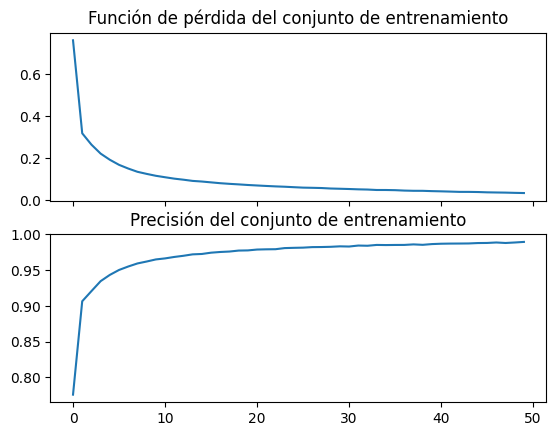

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['accuracy'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

In [ ]:
# Seleccionar una imagen de los datos de prueba
img_index = 1
img = X_test[img_index]

# Escalar la imagen añadiendo una dimensión extra al tensor
img_escalado = np.expand_dims(img, axis=0)

# Hacer una predicción usando el modelo
predicciones = model.predict(img_escalado)

# Identificar la clase predicha por el modelo
clase_predecida = np.argmax(predicciones[0])

# Imprimir la clase predicha y la clase verdadera
print("Clase predecida:", clase_predecida)
print("Clase verdadera:", y_test[img_index])

1/1 [==============================] - 0s 78ms/step
Clase predecida: 2
Clase verdadera: 2


1/1 [==============================] - 0s 30ms/step


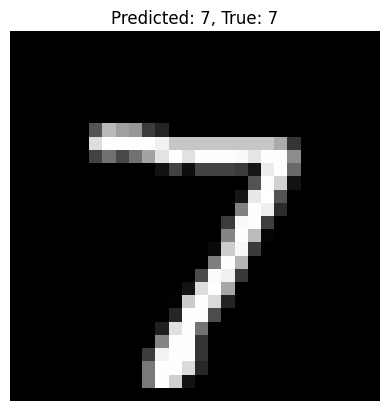

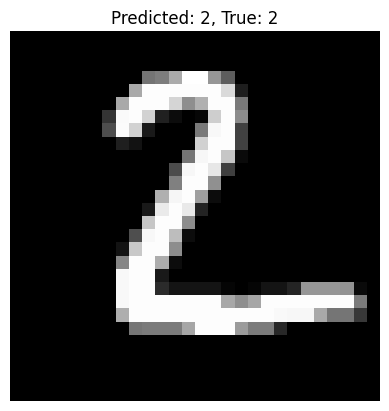

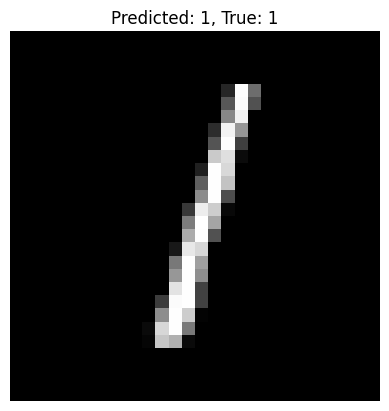

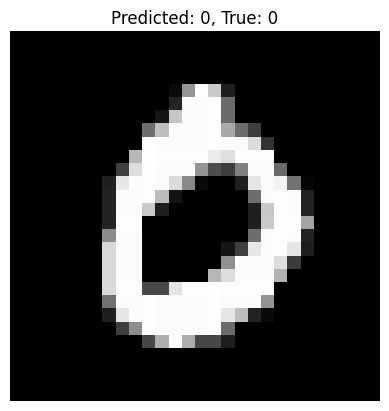

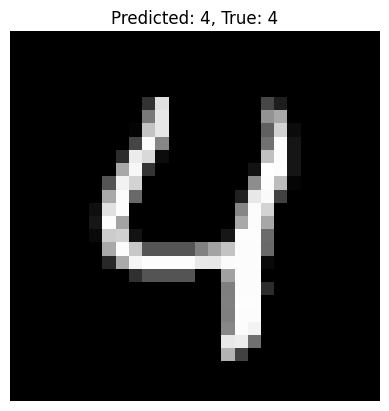

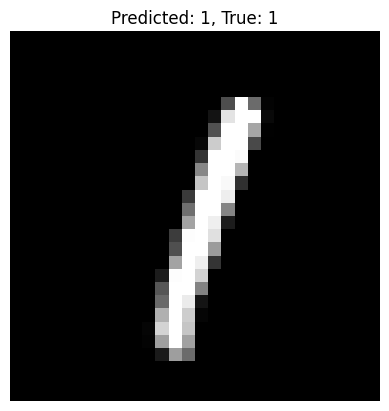

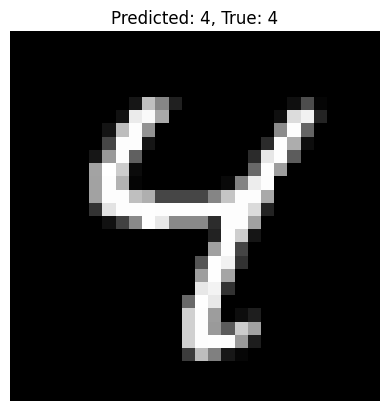

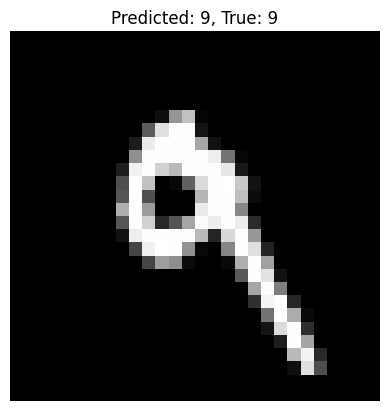

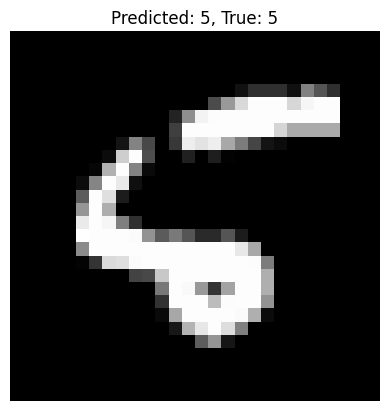

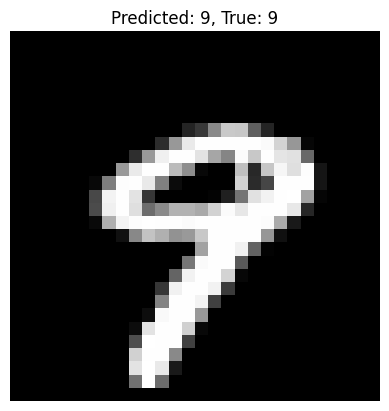

In [ ]:
predicciones = model.predict(X_test[:10])
etiquetas = tf.argmax(predicciones, axis=1).numpy()

for i in range(10):
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title(f"Predicted: {etiquetas[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()